In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


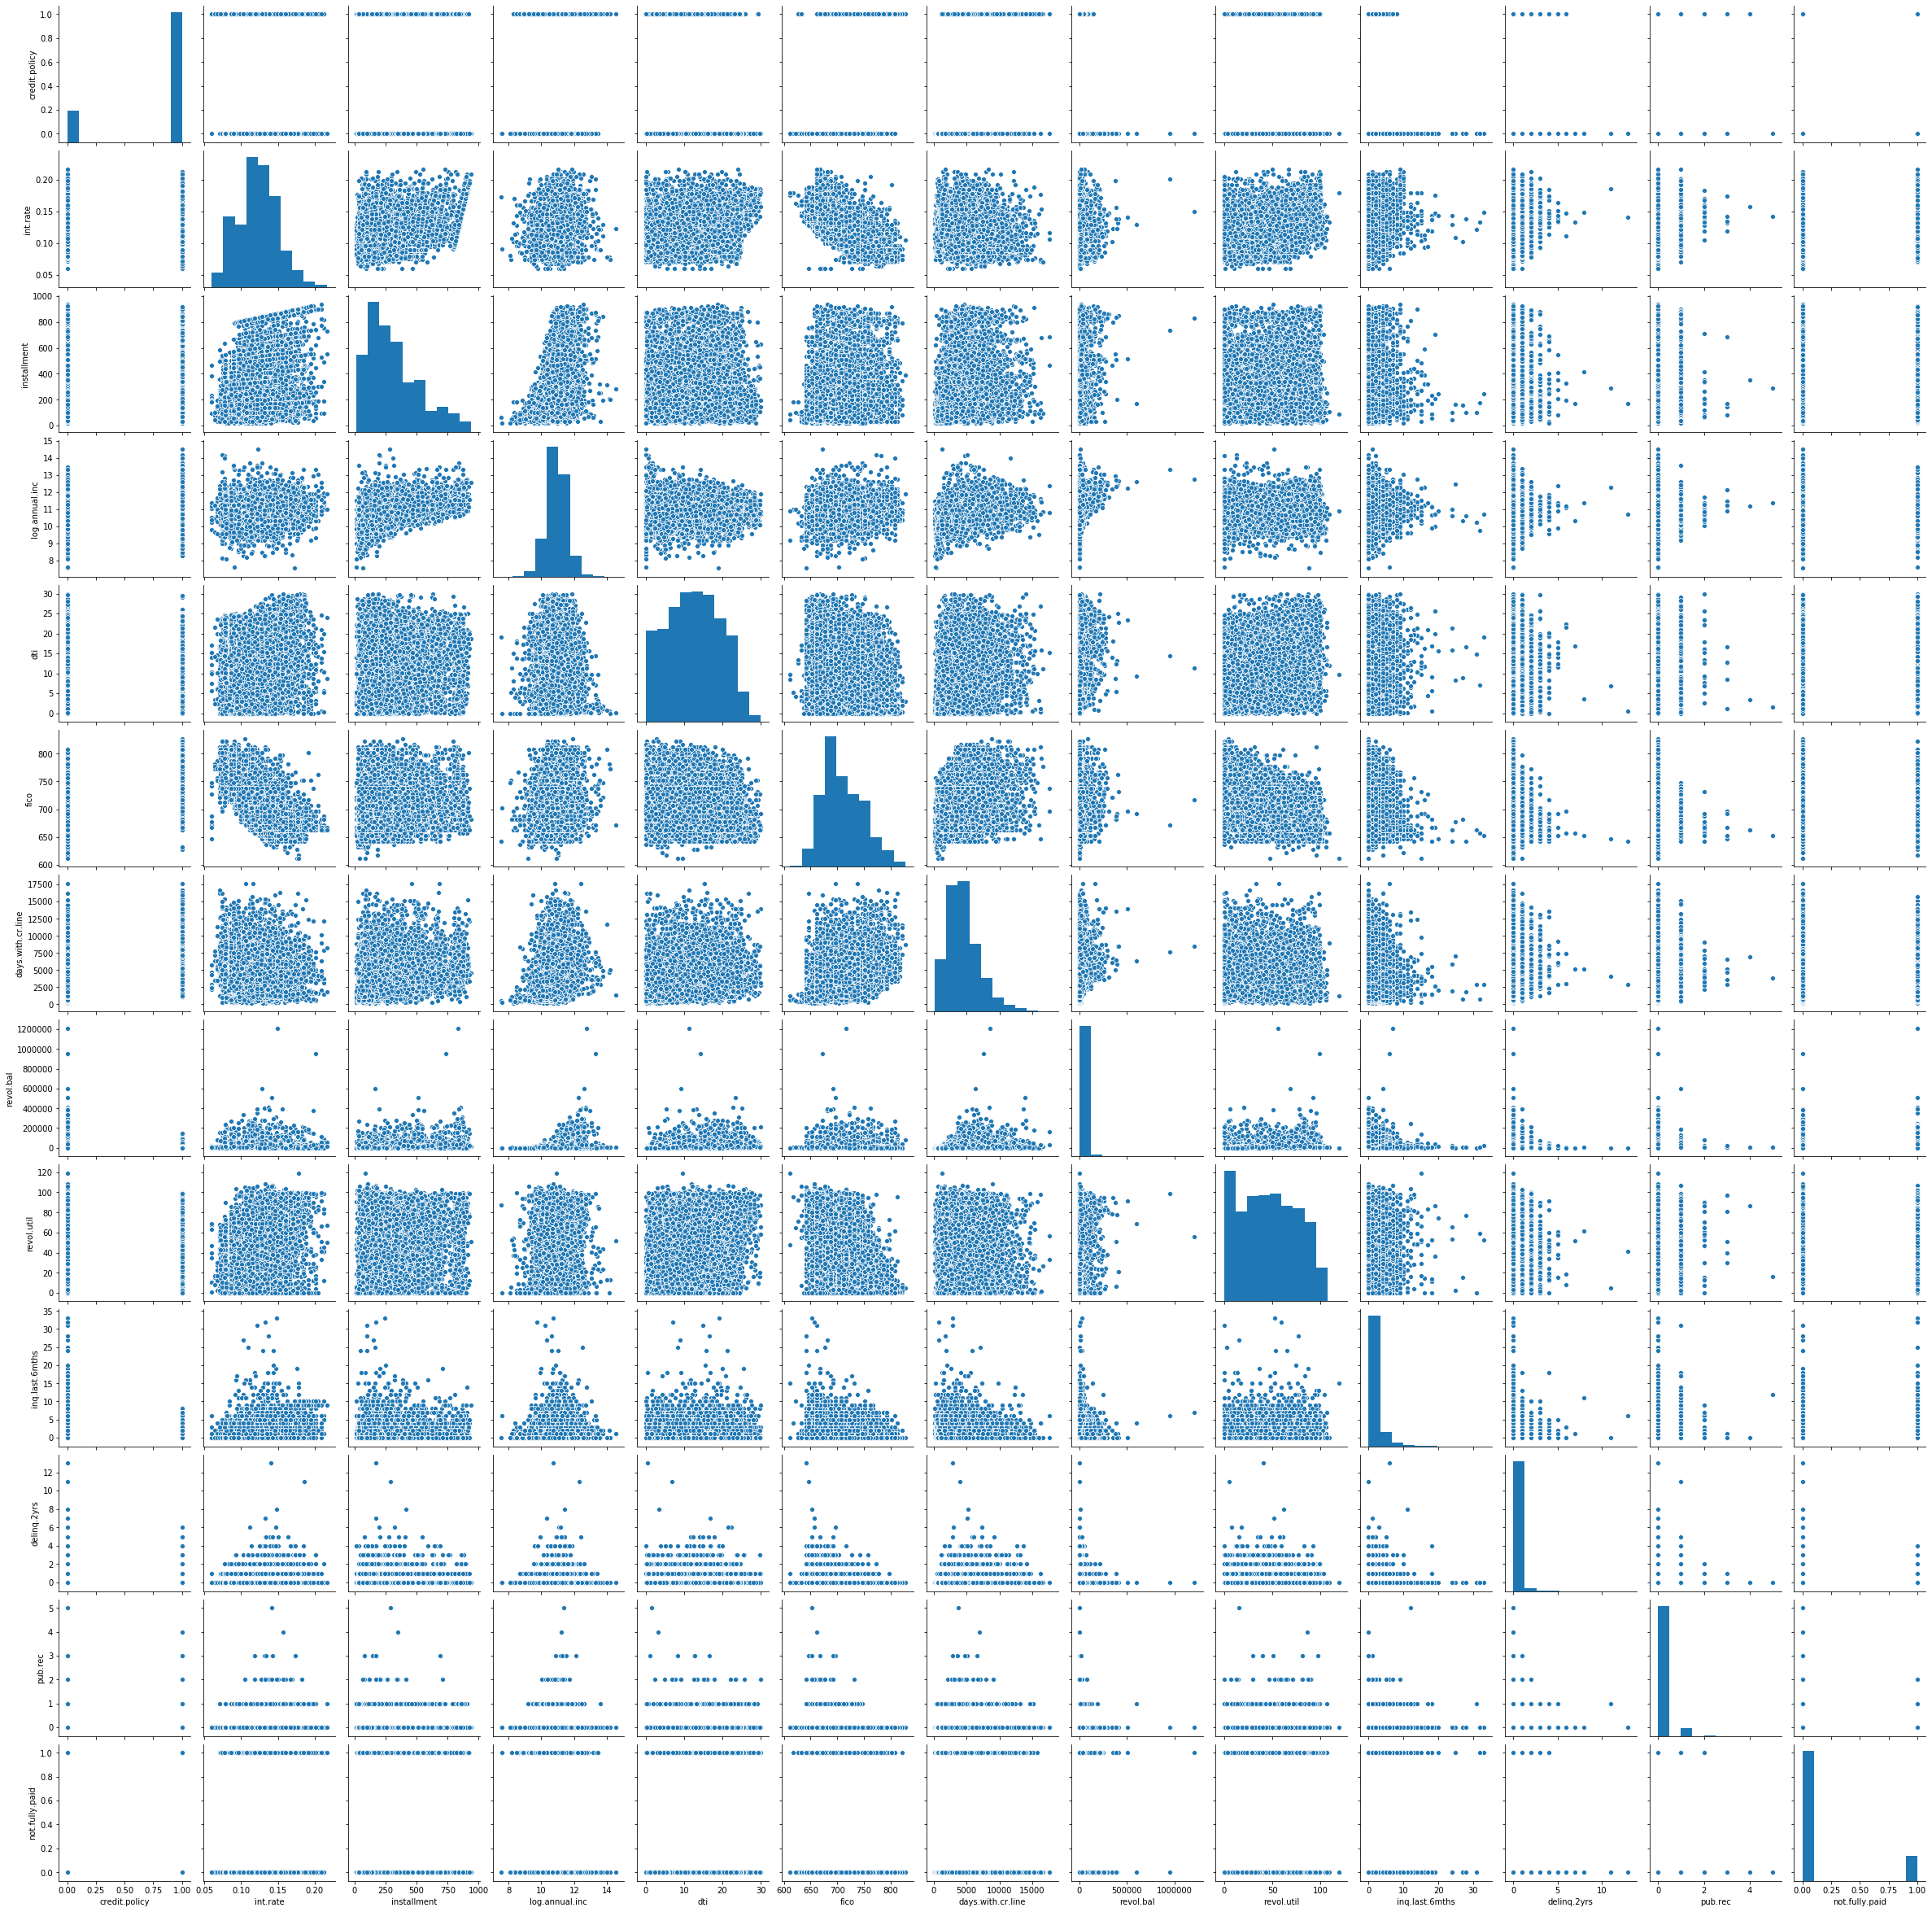

In [5]:
fig=sns.pairplot(df)

In [9]:
fig.savefig('pairplots2.jpg')

In [12]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [15]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


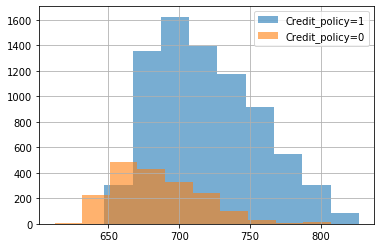

In [21]:
fig=df[df['credit.policy']==1]['fico'].hist(label='Credit_policy=1',alpha=0.6)
fig=df[df['credit.policy']==0]['fico'].hist(label='Credit_policy=0',alpha=0.6)
plt.legend()

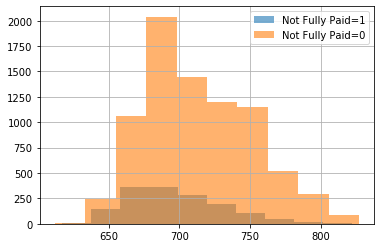

In [22]:
fig=df[df['not.fully.paid']==1]['fico'].hist(label='Not Fully Paid=1',alpha=0.6)
fig=df[df['not.fully.paid']==0]['fico'].hist(label='Not Fully Paid=0',alpha=0.6)
plt.legend()

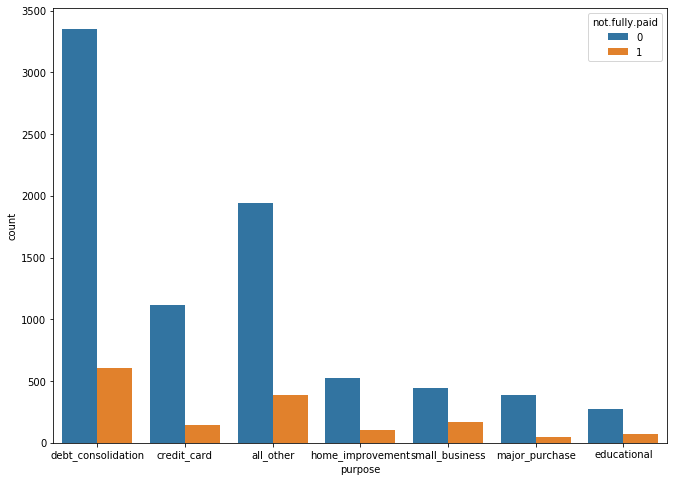

In [28]:
plt.figure(figsize=(11,8))
fig=sns.countplot(x='purpose',data=df,hue='not.fully.paid')

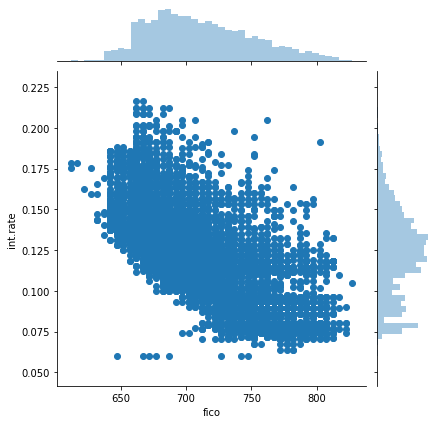

In [29]:
sns.jointplot(x='fico',y='int.rate',data=df)

In [32]:
#creating dummies for catagorical data i.e purpose

In [33]:
cf=['purpose']

In [34]:
final_data=pd.get_dummies(df,columns=cf,drop_first=True)

In [35]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [36]:
#train test split the data

In [39]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [42]:
#set the model using decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc=DecisionTreeClassifier()

In [45]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
pred1=dtc.predict(x_test)

In [47]:
pred1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
#evaluate data

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
print(confusion_matrix(y_test,pred1))
print()
print(classification_report(y_test,pred1))

[[3354  652]
 [ 613  170]]

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4006
           1       0.21      0.22      0.21       783

    accuracy                           0.74      4789
   macro avg       0.53      0.53      0.53      4789
weighted avg       0.74      0.74      0.74      4789



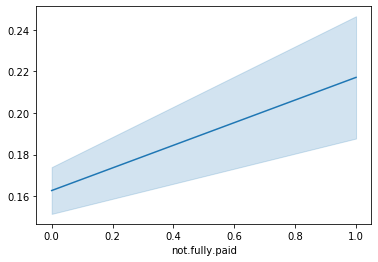

In [55]:
sns.lineplot(y_test,pred1)

In [52]:
#now using random forest with n_estimator as 500

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc=RandomForestClassifier(n_estimators=500)

In [64]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
pred2=rfc.predict(x_test)

In [66]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#evaluate data

In [67]:
print(confusion_matrix(y_test,pred2))
print()
print(classification_report(y_test,pred2))

[[3992   14]
 [ 767   16]]

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4006
           1       0.53      0.02      0.04       783

    accuracy                           0.84      4789
   macro avg       0.69      0.51      0.48      4789
weighted avg       0.79      0.84      0.77      4789



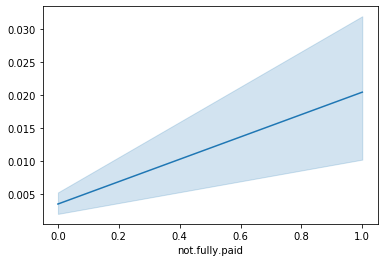

In [68]:
sns.lineplot(y_test,pred2)

In [69]:
#comparison

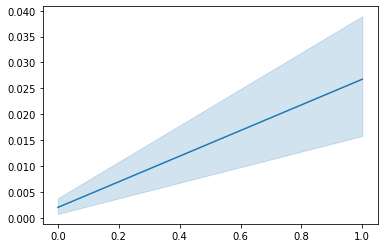

In [74]:
sns.lineplot(pred1,pred2)

In [ ]:
#the end